In [2]:
#Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
hb = pd.read_csv('C:/Resume/Hotel Booking Analysis/hotel_booking.csv')

In [5]:
hb.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
hb['reservation_status_date'] = pd.to_datetime(hb['reservation_status_date'])

In [7]:
hb.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [8]:
for col in hb.describe(include = 'object').columns:
    print(col)
    print(hb[col].unique)

hotel
<bound method Series.unique of 0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object>
arrival_date_month
<bound method Series.unique of 0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119390, dtype: object>
meal
<bound method Series.unique of 0         BB
1         BB
2         BB
3         BB
4         BB
          ..
119385    BB
119386    BB
119387    BB
119388    BB
119389    HB
Name: meal, Length: 119390, dtype: object>
country
<bound method Series.unique of 0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA

In [9]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hb.drop(['company','agent'], axis = 1, inplace = True)
hb.dropna(inplace = True)

In [11]:
hb = hb[hb['adr']<5000]

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


<BarContainer object of 2 artists>

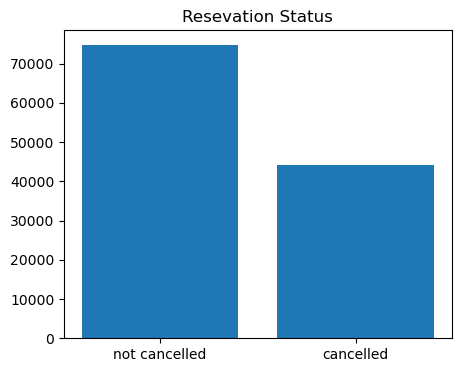

In [12]:
cancelled_perc = hb['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Resevation Status')
plt.bar(['not cancelled', 'cancelled'],hb['is_canceled'].value_counts())

NameError: name 'bbox_to_anchor' is not defined

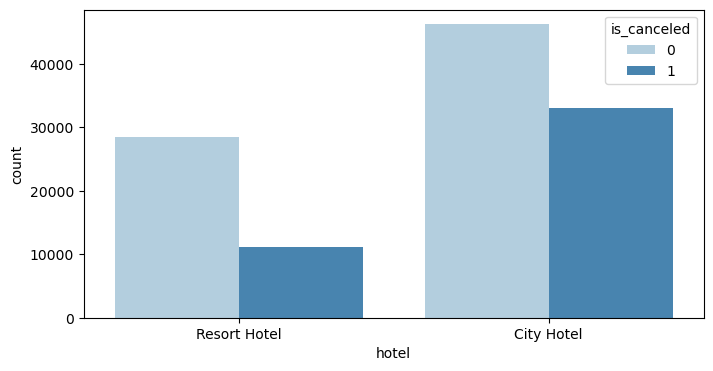

In [13]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = hb, palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabels('hotel')
plt.ylabels('number of reservations')
plt.legend(['not canceled','canceled'])

In [15]:
resort_hotel = hb[hb['hotel'] == 'Resort Hotel']
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

city_hotel = hb[hb['hotel'] == 'City Hotel']
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

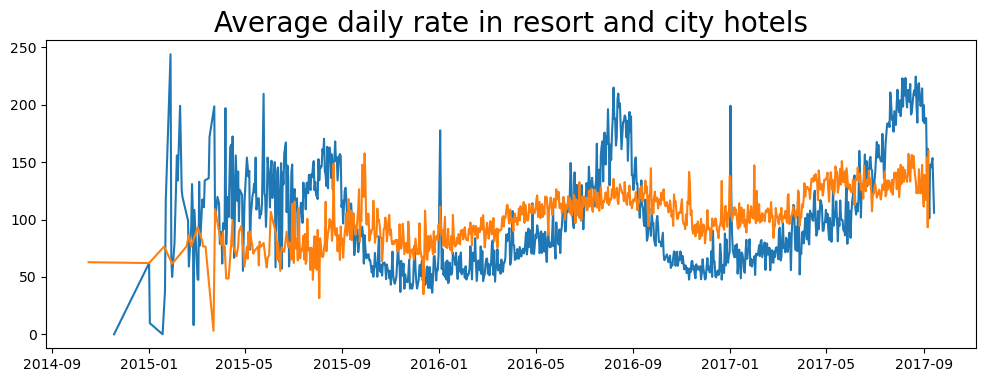

In [16]:
plt.figure(figsize = (12,4))
plt.title('Average daily rate in resort and city hotels' , fontsize = 20)
plt.plot(resort_hotel.index , resort_hotel['adr'], label = 'Resort Hotel' )
plt.plot(city_hotel.index , city_hotel['adr'], label = 'City Hotel' )
plt.show()

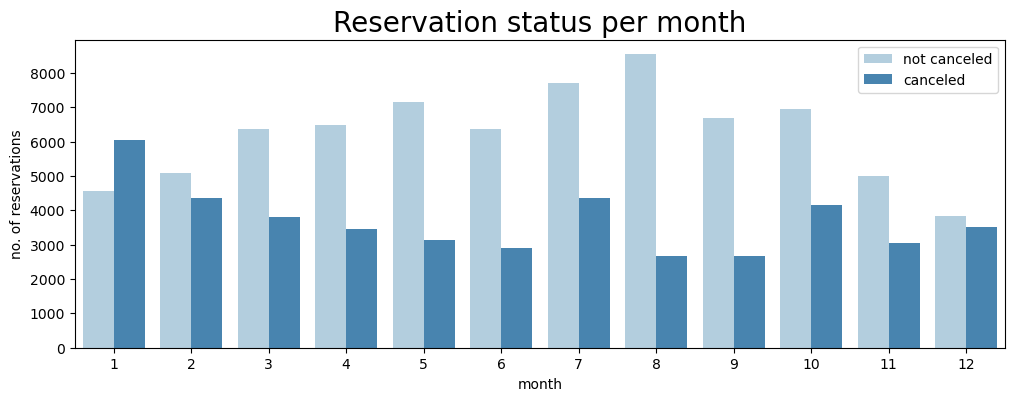

In [18]:
#creating a new col "month"
hb['month'] = hb['reservation_status_date'].dt.month


plt.figure(figsize =(12,4))
ax1 = sns.countplot(x ='month', hue = 'is_canceled', data= hb, palette = 'Blues')
legend_labels,_ =ax1. get_legend_handles_labels()
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('no. of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

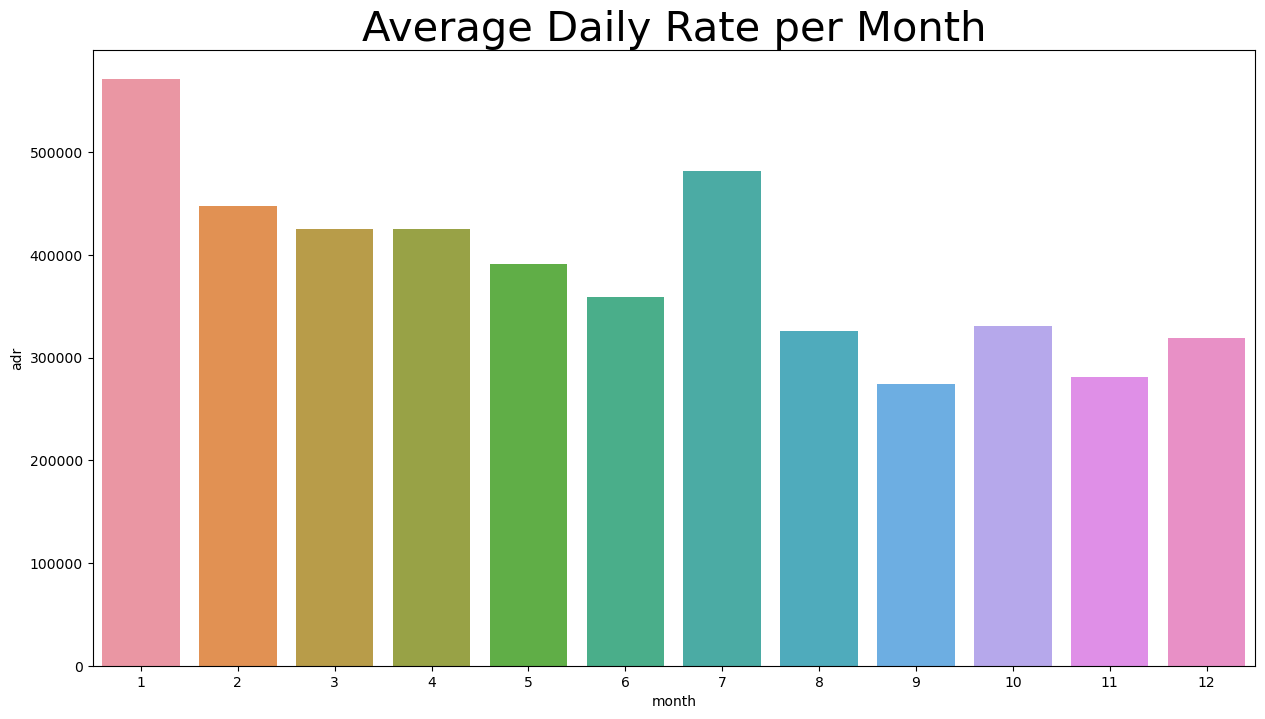

In [24]:
plt.figure(figsize = (15,8))
plt.title('Average Daily Rate per Month', fontsize = 30)
sns.barplot('month','adr', data = hb[hb['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

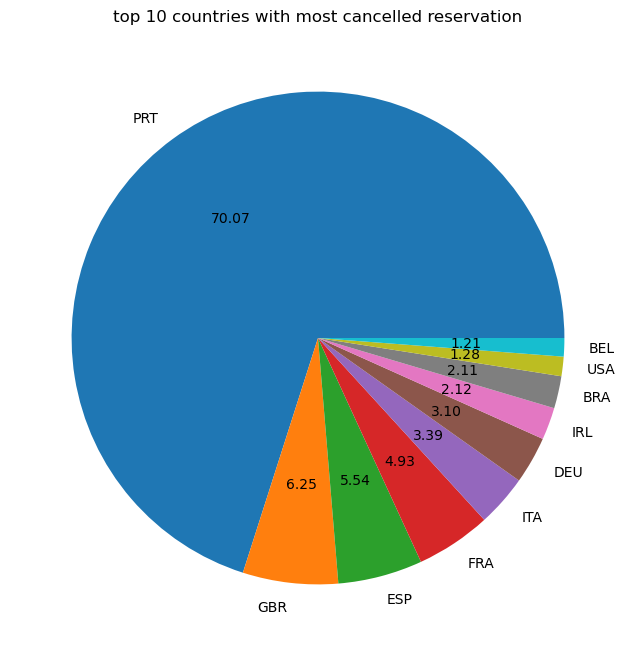

In [27]:
cancelled_data = hb[hb['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('top 10 countries with most cancelled reservation')
plt.pie(top_10_country, autopct = '%.2f', labels =top_10_country.index)
plt.show()

In [34]:
hb['market_segment'].value_counts(normalize = 1)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [35]:
cancelled_data['market_segment'].value_counts(normalize = 1)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64